<a href="https://colab.research.google.com/github/kareem743/projects/blob/main/med_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Genreal overview of the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
import tensorflow as tf

In [2]:
df=pd.read_csv('/content/med-insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
print(f'There are {df.shape[0]} rows\nThere are {df.shape[1]} colmns')

There are 1338 rows
There are 7 colmns


In [4]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
for i in df.select_dtypes(object).columns:
   print(df[i].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


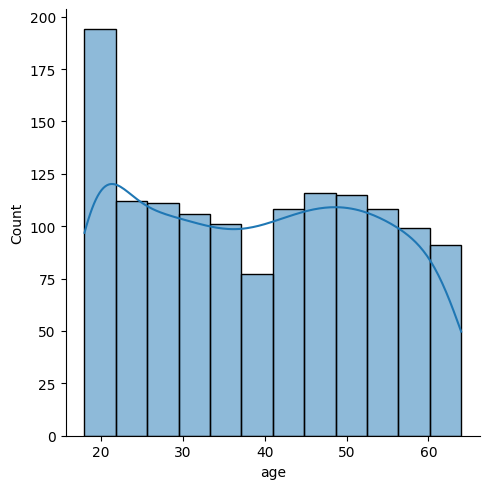

In [8]:
sns.displot(df['age'], kde=True)

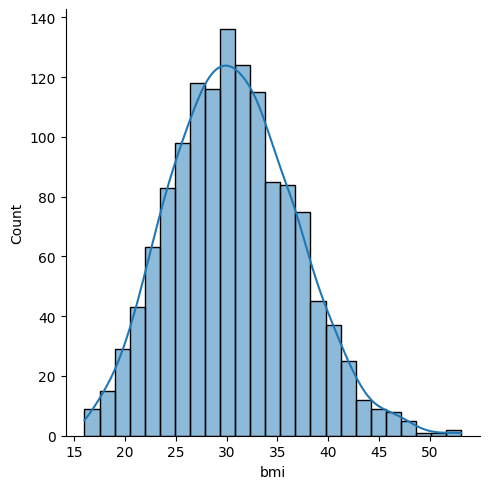

In [9]:
sns.displot(df['bmi'], kde=True)

<Axes: xlabel='age', ylabel='expenses'>

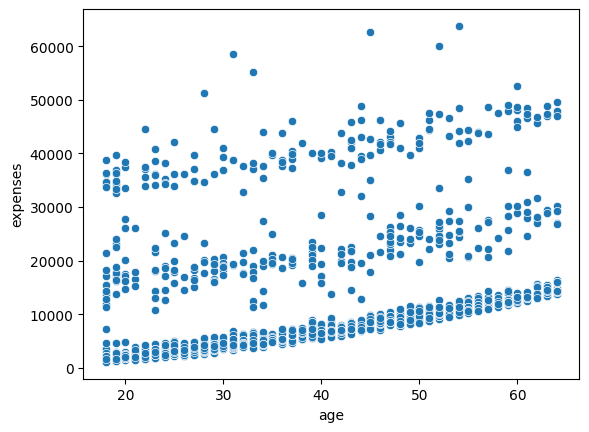

In [10]:
sns.scatterplot(x=df['age'],y=df['expenses']	)

<Axes: xlabel='bmi', ylabel='expenses'>

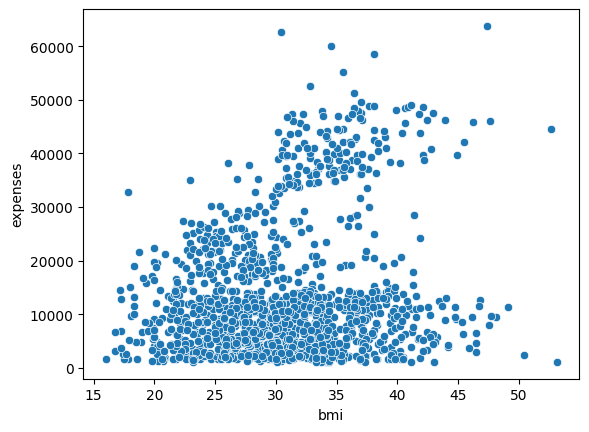

In [11]:
sns.scatterplot(x=df['bmi'],y=df['expenses']	)

<Axes: xlabel='children', ylabel='expenses'>

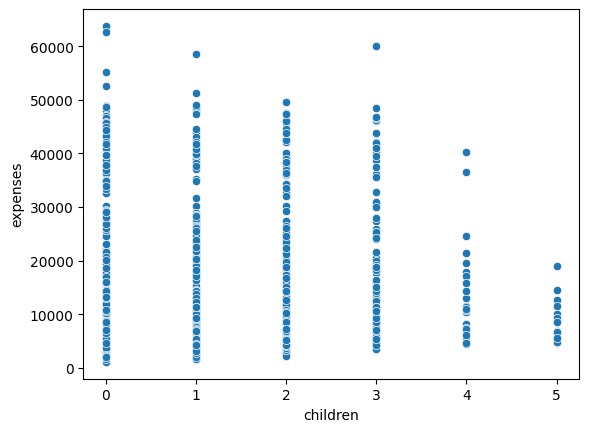

In [12]:
sns.scatterplot(x=df['children'],y=df['expenses']	)

<Axes: xlabel='region', ylabel='expenses'>

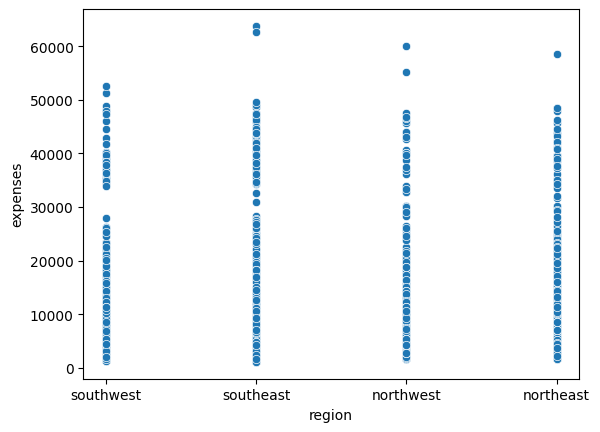

In [13]:
sns.scatterplot(data=df,x=df['region'],y=df['expenses']	)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
# Create a column transformer object with a scaler and an encoder
ct = ColumnTransformer([('scaler', MinMaxScaler(), [0,2]),
                        ('encoder', OneHotEncoder(), [5])])
transformed=ct.fit_transform(df.loc[:, df.columns != 'expenses'],df['expenses'])
transformed_df=pd.DataFrame(transformed,columns=['Age','BMI','southwest','southeast','northwest','northeast'])

In [15]:
df=pd.concat([df,transformed_df], axis=1)
df.drop(['age','bmi','region'],axis=1,inplace=True)

In [16]:
df['sex'].replace({'female':0,'male':1},inplace=True)
df['smoker'].replace({'no':0,'yes':1},inplace=True)
df[['sex','smoker']]=df[['sex','smoker']].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1338 non-null   bool   
 1   children   1338 non-null   int64  
 2   smoker     1338 non-null   bool   
 3   expenses   1338 non-null   float64
 4   Age        1338 non-null   float64
 5   BMI        1338 non-null   float64
 6   southwest  1338 non-null   float64
 7   southeast  1338 non-null   float64
 8   northwest  1338 non-null   float64
 9   northeast  1338 non-null   float64
dtypes: bool(2), float64(7), int64(1)
memory usage: 86.4 KB


<Axes: >

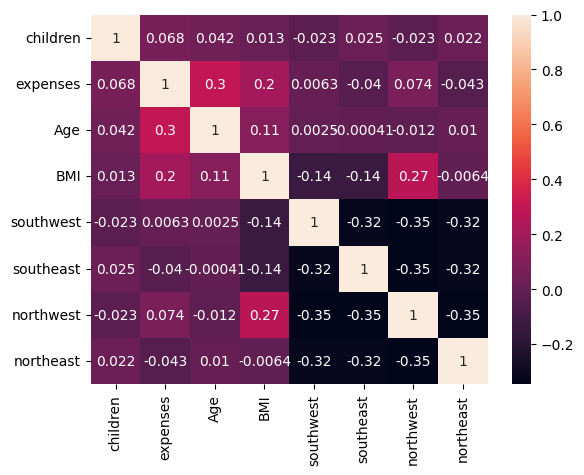

In [17]:

corr=df.select_dtypes(exclude=bool).corr()
sns.heatmap(corr,annot=True)

# **Train-test split**

In [18]:
from sklearn.model_selection import train_test_split
y=df['expenses']
x=df.drop(['expenses'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"X_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_train : {y_test.shape}")

X_train : (1070, 9)
X_test  : (268, 9)
y_train : (1070,)
y_train : (268,)


# **selecting numerical features**

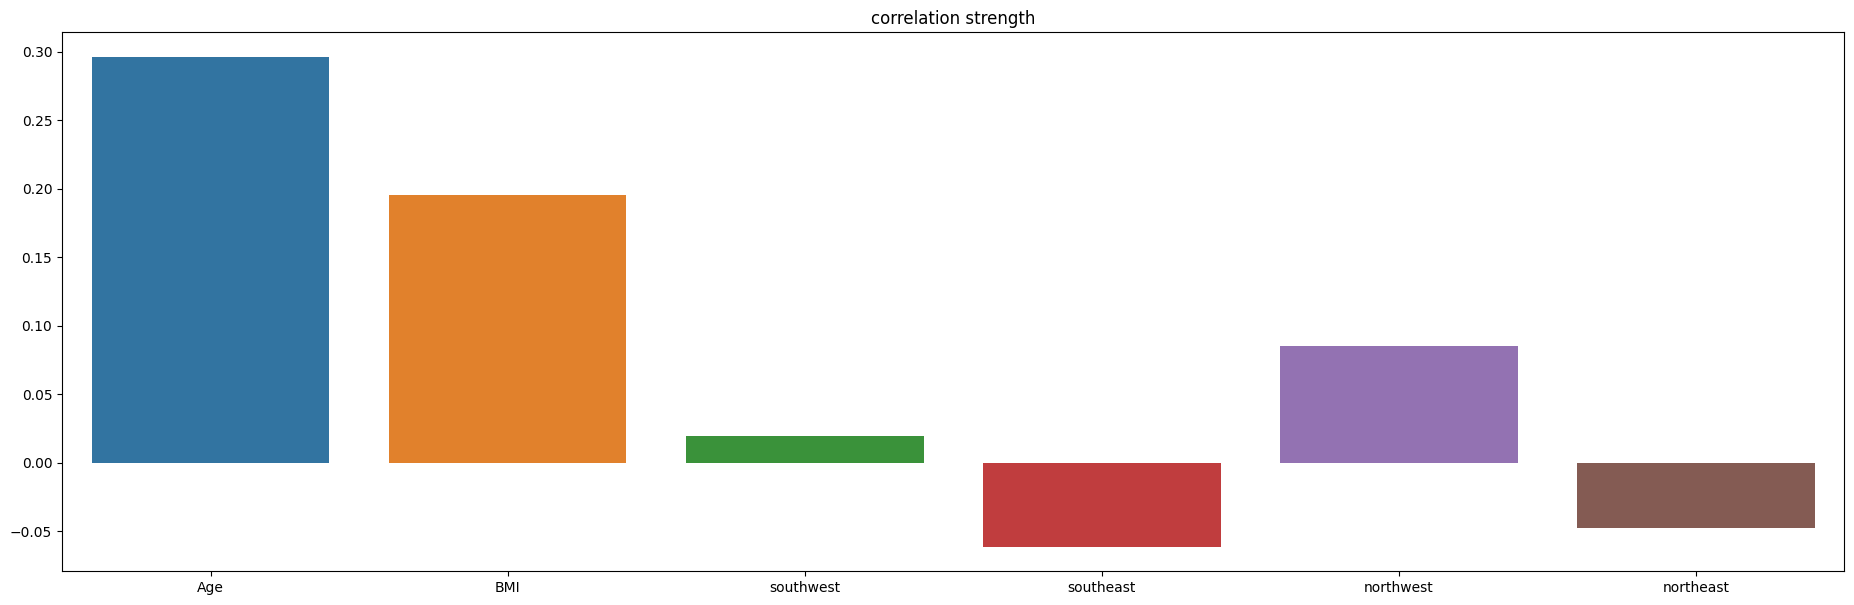

In [47]:
#we will take into account the region but remember this isnt an accurate way to measure the correlation
corr_cont=X_train.select_dtypes(exclude=bool).corrwith(y_train)
sns.barplot(x=corr_cont.index, y=corr_cont.values)
plt.title("correlation strength")
plt.gcf().set_size_inches(23, 7)
plt.show()

In [20]:
#drop the least correlated feature
X_train.drop("children",inplace=True,axis=1)
X_test.drop("children",inplace=True,axis=1)

# **selecting catgorical features**

The point biserial correlation coefficient (rpb) is a correlation coefficient used when one variable is dichotomous; Y can either be “naturally” dichotomous, like whether a coin lands heads or tails, or an artificially dichotomized variable1. It measures the relationship between a binary variable and a continuous variable. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship2


---




---




The null hypothesis for the point biserial correlation test is that there is no correlation between the binary variable and the continuous variable in the population. In other words, the population correlation coefficient ρ is equal to zero. The alternative hypothesis is that there is a correlation between the variables and ρ is not equal to zero

There was a strong positive correlation between y_train and smoker, which approximately = 0.80, indicating that smokers had higher values of y_train than non-smokers. There was a weak positive correlation between y_train and sex, which approximately= 0.05 indicating that there was no significant difference in y_train between males and females.

<Axes: >

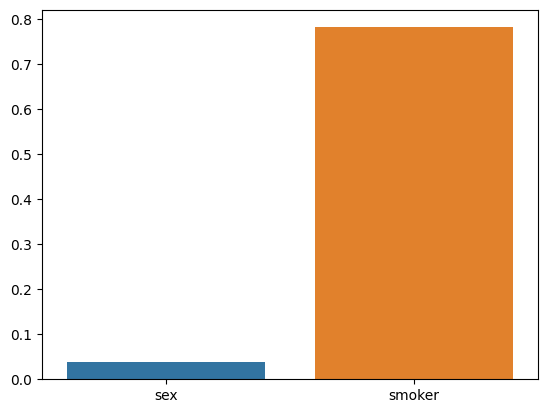

In [21]:
corr_cat=X_train.select_dtypes(bool).corrwith(y_train,method=stats.pointbiserialr)
sns.barplot(x=corr_cat.iloc[0].index,y=corr_cat.iloc[0].values)

The point biserial correlation test resulted in a p-value of (insert the p-value here), which is less than the significance level of 0.01. Therefore, we rejected the null hypothesis of no correlation between the binary variable and the continuous variable for **smoker**

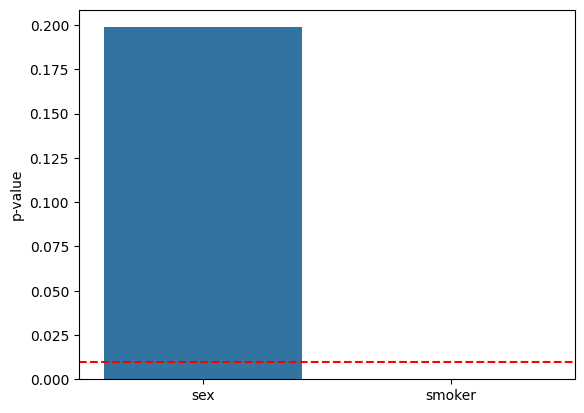

In [22]:
sns.barplot(x=corr_cat.iloc[1].index,y=corr_cat.iloc[1].values)
plt.ylabel('p-value')
plt.axhline(y=0.01, color='red', linestyle='--', label='Significance level')

In [23]:
#drop the least correlated feature
X_train.drop("sex",inplace=True,axis=1)
X_test.drop("sex",inplace=True,axis=1)

In [29]:
X_train_np=X_train.to_numpy(dtype='float32')
X_test_np=X_test.to_numpy(dtype='float32')
y_train_np=y_train.to_numpy(dtype='float32')
y_test_np=y_test.to_numpy(dtype='float32')

# **Training the model**

In [30]:

#a rule of thumb is to make the input layer size like the number of columns,as a starting point at least
len(X_train.columns)

7

In [48]:
import tensorflow_addons as tfa
#Setting a random seed can help to ensure that the results of your machine learning experiments are reproducibl
tf.random.set_seed(41)
#Creating a sequential model with five dense layers and different activation
model = tf.keras.Sequential([

    # The first layer has 6 units, a relu activation function, and a l1 kernel regularizer with a weight of 90
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(90)),
    # The second layer has 2 units, a relu activation function, and a l1 kernel regularizer with a weight of 90

    tf.keras.layers.Dense(2, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(90)),

        # The output layer has 1 unit, no activation function, and a l2 kernel regularizer with a weight of 90
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(90))
])
#Compiling the model with the Adam optimizer, the binary cross-entropy loss function,
model.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
loss=tf.keras.losses.MeanSquaredError(),
# The R-squared metric tells us how well the model fits the data by comparing the variation in the predictions with the variation in the observations
# A higher R-squared value means that the model can explain more of the variation in the data
metrics=[ tfa.metrics.RSquare()]
)
#Fitting the model on the training data
model.fit(X_train_np, y_train_np, epochs=1000,validation_split=0.2)
#Evaluating the model on the test data and printing the loss and accuracy


Epoch 1/1000
27/27 [==============================] - 1s 13ms/step - loss: 259489824.0000 - r_square: -0.7623 - val_loss: 97077608.0000 - val_r_square: 0.1759
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 88678392.0000 - r_square: 0.3980 - val_loss: 60511144.0000 - val_r_square: 0.4865
Epoch 3/1000
27/27 [==============================] - 0s 5ms/step - loss: 51252800.0000 - r_square: 0.6522 - val_loss: 38335056.0000 - val_r_square: 0.6748
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 40829756.0000 - r_square: 0.7230 - val_loss: 35759232.0000 - val_r_square: 0.6967
Epoch 5/1000
27/27 [==============================] - 0s 4ms/step - loss: 39554320.0000 - r_square: 0.7316 - val_loss: 33671460.0000 - val_r_square: 0.7144
Epoch 6/1000
27/27 [==============================] - 0s 4ms/step - loss: 38805604.0000 - r_square: 0.7367 - val_loss: 33211664.0000 - val_r_square: 0.7183
Epoch 7/1000
27/27 [==============================] - 0s 4ms/

In [49]:
loss, r2_score = model.evaluate(X_test_np, y_test_np)
print(f"R-squared: {r2_score}")

9/9 [==============================] - 0s 3ms/step - loss: 25198798.0000 - r_square: 0.8482
R-squared: 0.8481934666633606
